# Entrainement de plusieurs modèles sur 4 classes

### Lecture des fichiers

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

pd.set_option('display.max_columns', None)

#df = pd.read_csv("../../../../Data/accidents_data.zip", compression=dict(method='zip', archive_name='accidents_data.csv'))

df_x = pd.read_csv("../../../../Data/var_explicatives.zip", compression=dict(method='zip', archive_name='var_explicatives.csv'))
df_y = pd.read_csv("../../../../Data/var_cible.zip", compression=dict(method='zip', archive_name='var_cible.csv'))

display(df_x.head(3))
display(df_y.head(3))

X = df_x.copy()
y = df_y['grav']

#num_cols = ['nbv', 'vma', 'hh', 'age']



,mois_1,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,mois_10,mois_11,mois_12,lum_1,lum_2,lum_3,lum_4,lum_5,agg_1,agg_2,int_1,int_2,int_3,int_4,int_5,int_6,int_7,int_8,int_9,atm_1,atm_2,atm_3,atm_4,atm_5,atm_6,atm_7,atm_8,atm_9,col_1,col_2,col_3,col_4,col_5,col_6,col_7,catr_1,catr_2,catr_3,catr_4,catr_5,catr_6,catr_7,catr_9,circ_1,circ_2,circ_3,circ_4,vosp_0,vosp_1,vosp_2,vosp_3,prof_1,prof_2,prof_3,prof_4,plan_1,plan_2,plan_3,plan_4,surf_1,surf_2,surf_3,surf_4,surf_5,surf_6,surf_7,surf_8,surf_9,infra_0,infra_1,infra_2,infra_3,infra_4,infra_5,infra_6,infra_7,infra_8,infra_9,situ_1,situ_2,situ_3,situ_4,situ_5,situ_6,situ_8,catv_0,catv_1,catv_2,catv_3,catv_7,catv_10,catv_13,catv_14,catv_15,catv_16,catv_17,catv_20,catv_21,catv_30,catv_31,catv_32,catv_33,catv_34,catv_35,catv_36,catv_37,catv_38,catv_39,catv_40,catv_41,catv_42,catv_43,catv_50,catv_60,catv_80,catv_99,obs_0,obs_1,obs_2,obs_3,obs_4,obs_5,obs_6,obs_7,obs_8,obs_9,obs_10,obs_11,obs_12,obs_13,obs_14,obs_15,obs_16,obs_17,obsm_0,obsm_1,obsm_2,obsm_4,obsm_5,obsm_6,obsm_9,choc_0,choc_1,choc_2,choc_3,choc_4,choc_5,choc_6,choc_7,choc_8,choc_9,manv_0,manv_1,manv_2,manv_3,manv_4,manv_5,manv_6,manv_7,manv_8,manv_9,manv_10,manv_11,manv_12,manv_13,manv_14,manv_15,manv_16,manv_17,manv_18,manv_19,manv_20,manv_21,manv_22,manv_23,manv_24,manv_25,manv_26,motor_0,motor_1,motor_2,motor_3,motor_4,motor_5,motor_6,place_1,place_2,place_3,place_4,place_5,place_6,place_7,place_8,place_9,place_10,catu_1,catu_2,catu_3,trajet_0,trajet_1,trajet_2,trajet_3,trajet_4,trajet_5,trajet_9,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,hh_8,hh_9,hh_10,hh_11,hh_12,hh_13,hh_14,hh_15,hh_16,hh_17,hh_18,hh_19,hh_20,hh_21,hh_22,hh_23,classe_age_0,classe_age_1,classe_age_2,classe_age_3,classe_age_4,classe_age_5,nbv,vma,sexe,secu_1,secu_2,secu_3,secu_4,secu_5,secu_6,secu_7,secu_8,secu_9,weekend
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,70.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,70.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0

,grav
0,1
1,1
2,0


>* 0 => Indemme
>* 1 => Blessé léger
>* 2 => Blessé hospitalisé
>* 3 => Tué

### La répartition de la variable cible

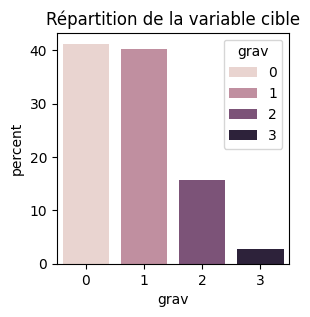

In [2]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (3, 3))
sns.countplot(x = y,stat='percent',hue=y)

plt.title("Répartition de la variable cible")
plt.show()



### Lecture du dataset d'entraînement et de test

In [3]:
# Split

X_train = pd.read_csv("../../../../Data/X_train.zip", compression=dict(method='zip', archive_name='X_train.csv'))
y_train = pd.read_csv("../../../../Data/y_train.zip", compression=dict(method='zip', archive_name='y_train.csv'))['grav']

X_test = pd.read_csv("../../../../Data/X_test.zip", compression=dict(method='zip', archive_name='X_test.csv'))
y_test = pd.read_csv("../../../../Data/y_test.zip", compression=dict(method='zip', archive_name='y_test.csv'))['grav']

print("X_train shape :",X_train.shape)
print("X_test shape :",X_test.shape)

X_train

X_train shape : (352893, 337)
X_test shape : (88224, 337)


,mois_1,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,mois_10,mois_11,mois_12,lum_1,lum_2,lum_3,lum_4,lum_5,agg_1,agg_2,int_1,int_2,int_3,int_4,int_5,int_6,int_7,int_8,int_9,atm_1,atm_2,atm_3,atm_4,atm_5,atm_6,atm_7,atm_8,atm_9,col_1,col_2,col_3,col_4,col_5,col_6,col_7,catr_1,catr_2,catr_3,catr_4,catr_5,catr_6,catr_7,catr_9,circ_1,circ_2,circ_3,circ_4,vosp_0,vosp_1,vosp_2,vosp_3,prof_1,prof_2,prof_3,prof_4,plan_1,plan_2,plan_3,plan_4,surf_1,surf_2,surf_3,surf_4,surf_5,surf_6,surf_7,surf_8,surf_9,infra_0,infra_1,infra_2,infra_3,infra_4,infra_5,infra_6,infra_7,infra_8,infra_9,situ_1,situ_2,situ_3,situ_4,situ_5,situ_6,situ_8,catv_0,catv_1,catv_2,catv_3,catv_7,catv_10,catv_13,catv_14,catv_15,catv_16,catv_17,catv_20,catv_21,catv_30,catv_31,catv_32,catv_33,catv_34,catv_35,catv_36,catv_37,catv_38,catv_39,catv_40,catv_41,catv_42,catv_43,catv_50,catv_60,catv_80,catv_99,obs_0,obs_1,obs_2,obs_3,obs_4,obs_5,obs_6,obs_7,obs_8,obs_9,obs_10,obs_11,obs_12,obs_13,obs_14,obs_15,obs_16,obs_17,obsm_0,obsm_1,obsm_2,obsm_4,obsm_5,obsm_6,obsm_9,choc_0,choc_1,choc_2,choc_3,choc_4,choc_5,choc_6,choc_7,choc_8,choc_9,manv_0,manv_1,manv_2,manv_3,manv_4,manv_5,manv_6,manv_7,manv_8,manv_9,manv_10,manv_11,manv_12,manv_13,manv_14,manv_15,manv_16,manv_17,manv_18,manv_19,manv_20,manv_21,manv_22,manv_23,manv_24,manv_25,manv_26,motor_0,motor_1,motor_2,motor_3,motor_4,motor_5,motor_6,place_1,place_2,place_3,place_4,place_5,place_6,place_7,place_8,place_9,place_10,catu_1,catu_2,catu_3,trajet_0,trajet_1,trajet_2,trajet_3,trajet_4,trajet_5,trajet_9,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,hh_8,hh_9,hh_10,hh_11,hh_12,hh_13,hh_14,hh_15,hh_16,hh_17,hh_18,hh_19,hh_20,hh_21,hh_22,hh_23,classe_age_0,classe_age_1,classe_age_2,classe_age_3,classe_age_4,classe_age_5,geoloc_0,geoloc_1,geoloc_2,geoloc_3,geoloc_4,geoloc_5,geoloc_6,geoloc_7,geoloc_8,geoloc_9,geoloc_10,geoloc_11,geoloc_12,geoloc_13,geoloc_14,geoloc_15,geoloc_16,geoloc_17,geoloc_18,geoloc_19,geoloc_20,geoloc_21,geoloc_22,geoloc_23,geoloc_24,geoloc_25,geoloc_26,geoloc_27,geoloc_28,geoloc_29,geoloc_30,geoloc_31,geoloc_32,geoloc_33,geoloc_34,geoloc_35,geoloc_36,geoloc_37,geoloc_38,geoloc_39,geoloc_40,geoloc_41,geoloc_42,geoloc_43,geoloc_44,geoloc_45,geoloc_46,geoloc_47,geoloc_48,geoloc_49,geoloc_50,geoloc_51,geoloc_52,geoloc_53,geoloc_54,geoloc_55,geoloc_56,geoloc_57,geoloc_58,geoloc_59,geoloc_60,geoloc_61,geoloc_62,geoloc_63,geoloc_64,geoloc_65,geoloc_66,geoloc_67,geoloc_68,geoloc_69,geoloc_70,geoloc_71,geoloc_72,geoloc_73,geoloc_74,geoloc_75,geoloc_76,geoloc_77,geoloc_78,geoloc_79,nbv,vma,sexe,secu_1,secu_2,secu_3,secu_4,secu_5,secu_6,secu_7,secu_8,secu_9,weekend
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.370371,0.719909,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.

### Fonction d'entraînement des modèles

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import classification_report_imbalanced
import time

df_model = None

def fit_model_and_report(name:str,model):
    global df_model
    
    # Train
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    # Calculer le temps d'entraînement en secondes
    training_time_seconds = end_time - start_time

    if training_time_seconds < 60:
        print(f"Temps d'entraînement : {training_time_seconds:.2f} seconds")
    else:
        # Convertir en minutes
        training_time = training_time_seconds / 60
        print(f"Temps d'entraînement : {training_time:.2f} minutes")

    #Predict
    y_pred = model.predict(X_test)
    # classification report
    print('Classification_Report:',name)
    report =classification_report_imbalanced(y_test, y_pred,output_dict=True)
    
    df_recall = pd.DataFrame.from_dict(report).transpose()
    
    # Suppression des lignes accuracy,avg_ et total_support
    df_recall = df_recall[~df_recall.index.str.contains('accuracy|avg|total_support')]
    
    # Ne garder que la colonne 'recall'
    df_recall = df_recall[['rec']]
    
    df_recall= df_recall.rename(columns={'rec':name})
    
    #display(df_recall.transpose())
    
    plt.figure(figsize = (3, 3))
    ax = sns.barplot(df_recall,x=df_recall.index.values,y=name,hue=df_recall.index.values)
    plt.title(name + ' with default parameters : Recall')

    for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()/2),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 0),
                    textcoords='offset points')
    
    plt.show()

    if df_model is None :
        df_model = df_recall.transpose()
    else:
        df_model = pd.concat([df_model, df_recall.transpose()])

    #display(df_model)


### Entraînement du modèle : LogisticRegression

Temps d'entraînement : 46.34 seconds
Classification_Report: LogisticRegression


/Users/thierno/Documents/DataScientest/Final_Project/MAR24_CDS_Accidents/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


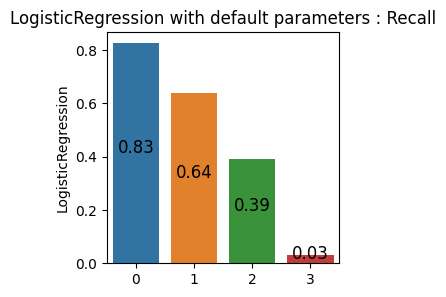

In [5]:
from sklearn.linear_model import LogisticRegression

fit_model_and_report('LogisticRegression', LogisticRegression(max_iter=300))

Remarques:
* 2 et 3 ont un recall très mauvais 

### Entraînement du modèle : k-NN

Temps d'entraînement : 0.27 seconds
Classification_Report: KNeighborsClassifier


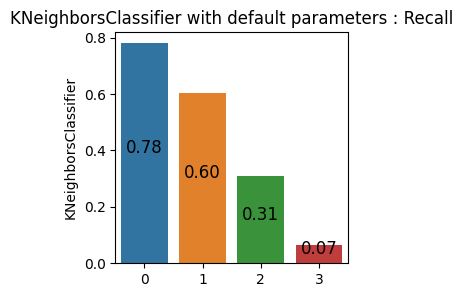

In [6]:
from sklearn.neighbors import KNeighborsClassifier
fit_model_and_report('KNeighborsClassifier', KNeighborsClassifier())

Remarques:
* Ne fait pas mieux que LR

In [7]:
### 7 . Modèle : SVM

In [8]:
# TODO SVM

In [9]:
# TODO SVM

### Entraînement du modèle : DecisionTreeClassifier

Temps d'entraînement : 12.60 seconds
Classification_Report: DecisionTreeClassifier


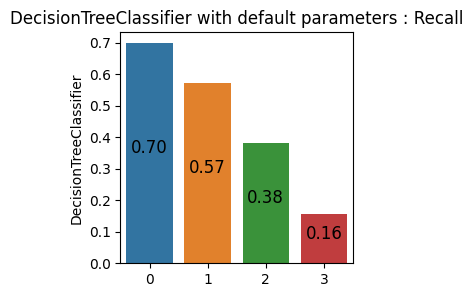

In [10]:
from sklearn.tree import DecisionTreeClassifier

fit_model_and_report('DecisionTreeClassifier', DecisionTreeClassifier())

Remarques:
* L'arbre de décision fait mieux que LR et KNN

### Entraînement du modèle : RandomForestClassifier

Temps d'entraînement : 1.34 minutes
Classification_Report: RandomForestClassifier


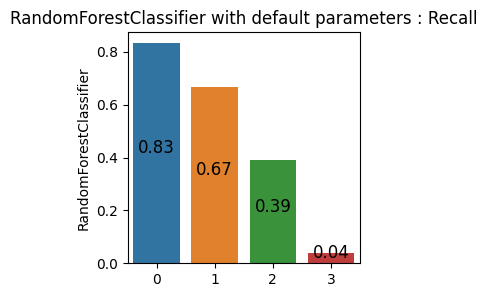

In [11]:
from sklearn.ensemble import RandomForestClassifier

fit_model_and_report('RandomForestClassifier', RandomForestClassifier())

Remarques :
* Recall est mauvais pour les classes les moins representées

### Entraînement du modèle : GradientBoostingClassifier

Temps d'entraînement : 6.91 minutes
Classification_Report: GradientBoostingClassifier


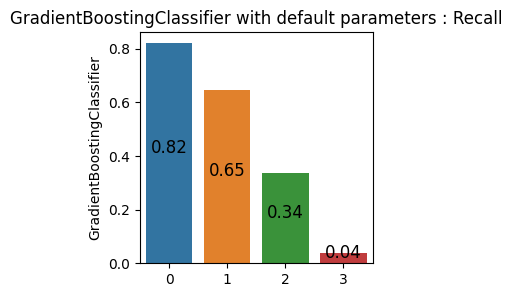

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

fit_model_and_report('GradientBoostingClassifier', GradientBoostingClassifier())

Remarques:
* Ne fait pas mieux que RF

### Entraînement du modèle : HistGradientBoostingClassifier

Temps d'entraînement : 50.15 seconds
Classification_Report: HistGradientBoostingClassifier


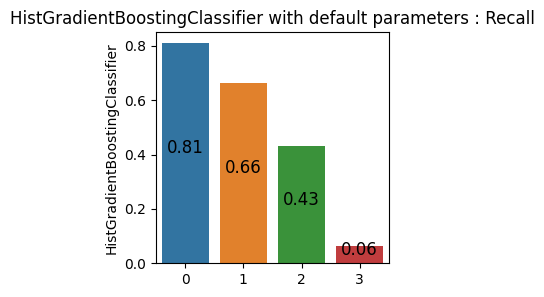

In [13]:
from sklearn.ensemble import HistGradientBoostingClassifier
fit_model_and_report('HistGradientBoostingClassifier', HistGradientBoostingClassifier())

Remarque:
* On remarque le HistGradientBoostingClassifier est plus rapide que le GradientBoosting et avec des meilleurs résultats

### Entraînement du modèle : AdaBoostClassifier

Temps d'entraînement : 25.88 seconds
Classification_Report: AdaBoostClassifier


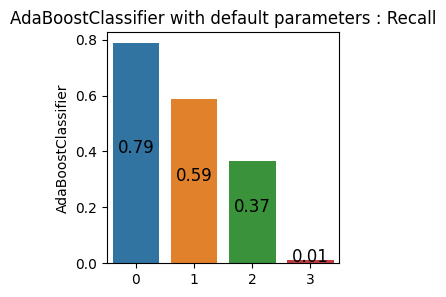

In [14]:
from sklearn.ensemble import AdaBoostClassifier

fit_model_and_report('AdaBoostClassifier', AdaBoostClassifier())

Remarques:
* Ne fait pas mieux

### Entraînement du modèle : Catboost

Temps d'entraînement : 37.62 seconds
Classification_Report: CatBoostClassifier


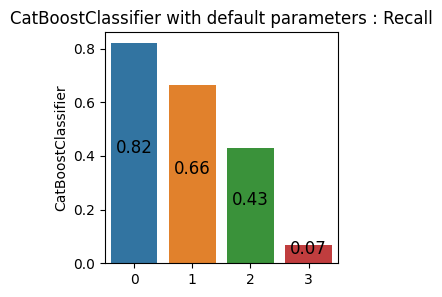

In [15]:
from catboost import CatBoostClassifier

fit_model_and_report('CatBoostClassifier', CatBoostClassifier(verbose=0))

Remarques:
* Pas forcement mieux

### Entraînement du modèle : XGBoost

Temps d'entraînement : 9.66 seconds
Classification_Report: XGBClassifier


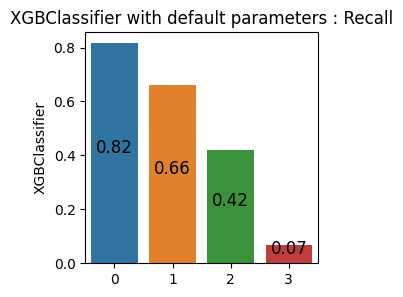

In [16]:
from xgboost import XGBClassifier

fit_model_and_report('XGBClassifier', XGBClassifier(random_state=42))

## Affichage des résultats

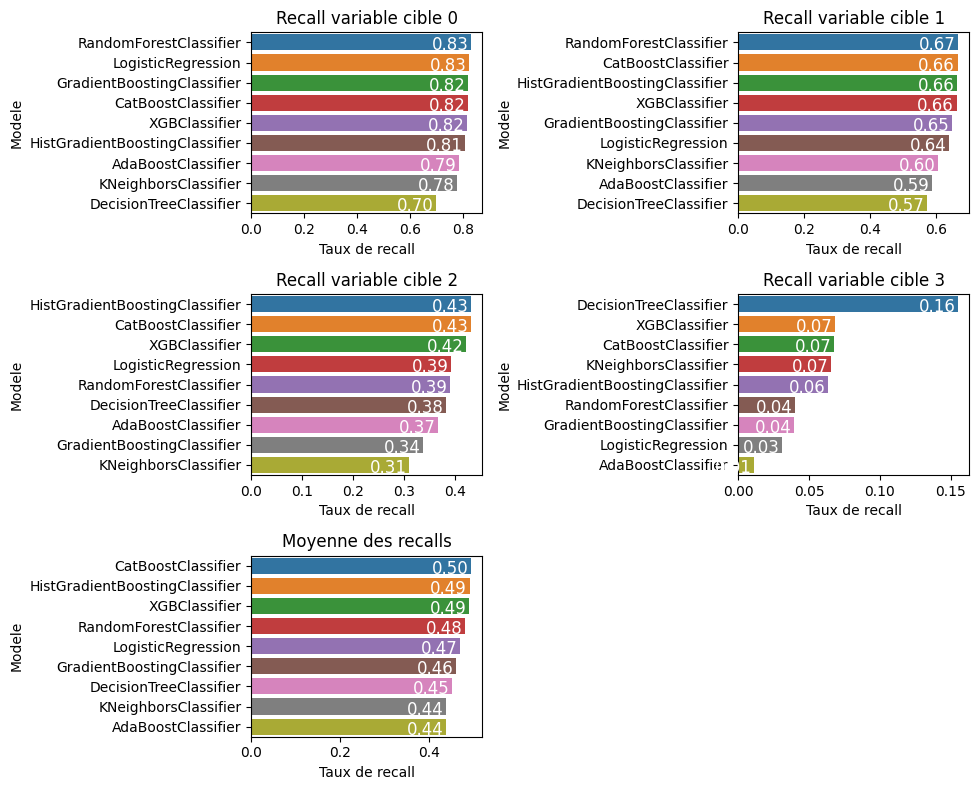

In [17]:

df_plot= df_model.copy()
df_plot['mean'] =df_plot.mean(axis=1)

plt.figure(figsize=(10, 8))

for i in range(0,5):
    if i <4 :
        var_ = df_plot[str(i)].sort_values(ascending=False)
        
        plt.subplot(3, 2,i+1)
        ax =sns.barplot(x=var_.values,y=var_.index,hue=var_.index)
        plt.title("Recall variable cible "+ str(i))
        
    else :
        mean = df_plot['mean'].sort_values(ascending=False)

        plt.subplot(3, 2,i+1)
        ax =sns.barplot(x=mean.values,y=mean.index,hue=mean.index)
        plt.title("Moyenne des recalls")
    
    plt.xlabel("Taux de recall")
    plt.ylabel("Modele")
    for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='white', xytext=(-15, 0),
                    textcoords='offset points')
        
plt.tight_layout()
plt.show()

### Conclusion:
>* Le modèle SVM n'a pas été entraîné car il prend énormément de temps d'entraînement en raison du nombre d'observations et de colonnes.
>* Aucun modèle n'est satisfaisant, car le recall des classes minoritaires est très bas
>* Le recall de la classe 3 est toujours entre 0.02 et 0.16 pour DecisionTreeClassifier


### Prochaine étape
> La prochaine étape consiste à rééquilibrer les classes via oversampling ou undersampling et à voir si nous avons une amélioration de la métrique recall